In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('./Sample - Superstore.csv')

In [3]:
# Data Preprocessing
df = df.drop(['Row ID', 'Order ID', 'Customer', 'Product ID'], axis=1, errors='ignore')  # Dropping non-essential columns
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d-%m-%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d-%m-%Y')
# Calculate shipping duration
df['Shipping Duration'] = (df['Ship Date'] - df['Order Date']).dt.days
df = df.drop(['Order Date', 'Ship Date','Product Name','Customer ID','Customer Name','Postal Code'], axis=1) #dropping original columns
df.head()

,Ship Mode,Segment,Country/Region,City,State/Province,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Shipping Duration
0,Standard Class,Consumer,United States,Houston,Texas,Central,Office Supplies,Paper,16.448,2,0.2,5.5512,4
1,Standard Class,Home Office,United States,Naperville,Illinois,Central,Office Supplies,Binders,3.540,2,0.8,-5.4870,4
2,Standard Class,Home Office,United States,Naperville,Illinois,Central,Office Supplies,Labels,11.784,3,0.2,4.2717,4
3,Standard Class,Home Office,United States,Naperville,Illinois,Central,Office Supplies,Storage,272.736,3,0.2,-64.7748,4
4,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,East,Office Supplies,Art,19.536,3,0.2,4.8840,7


In [4]:
print(df['Ship Mode'].value_counts())
print('-------------------------------------------------------------------------')
print(df['Segment'].value_counts())
print('-------------------------------------------------------------------------')
print(df['Country/Region'].value_counts())
print('-------------------------------------------------------------------------')
print(df['City'].value_counts())
print('-------------------------------------------------------------------------')
print(df['State/Province'].value_counts())
print('-------------------------------------------------------------------------')
print(df['Region'].value_counts())
print('-------------------------------------------------------------------------')
print(df['Category'].value_counts())
print('-------------------------------------------------------------------------')
print(df['Sub-Category'].value_counts())



Ship Mode
Standard Class    6120
Second Class      1979
First Class       1548
Same Day           547
Name: count, dtype: int64
-------------------------------------------------------------------------
Segment
Consumer       5281
Corporate      3090
Home Office    1823
Name: count, dtype: int64
-------------------------------------------------------------------------
Country/Region
United States    9994
Canada            200
Name: count, dtype: int64
-------------------------------------------------------------------------
City
New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
                ... 
Manhattan          1
Iowa City          1
Cedar Rapids       1
Baytown            1
Danbury            1
Name: count, Length: 542, dtype: int64
-------------------------------------------------------------------------
State/Province
California                   2001
New York                     1128
Texas                         985
Penns

In [5]:
pd.options.display.float_format = '{:,.2f}'.format
city_summary = df.groupby('City').agg({'Sales': 'sum', 'Profit': 'sum'})
city_summary = city_summary.sort_values(by='Sales', ascending=False)
print("\n--- Sales and Profit by City ---")
print(city_summary)



--- Sales and Profit by City ---
                   Sales     Profit
City                               
New York City 256,368.16  62,036.98
Los Angeles   175,851.34  30,440.76
Seattle       119,540.74  29,156.10
San Francisco 112,669.09  17,507.39
Philadelphia  109,077.01 -13,837.77
...                  ...        ...
Ormond Beach        2.81      -1.97
Pensacola           2.21      -1.48
Jupiter             2.06       0.15
Elyria              1.82      -1.40
Abilene             1.39      -3.76

[542 rows x 2 columns]


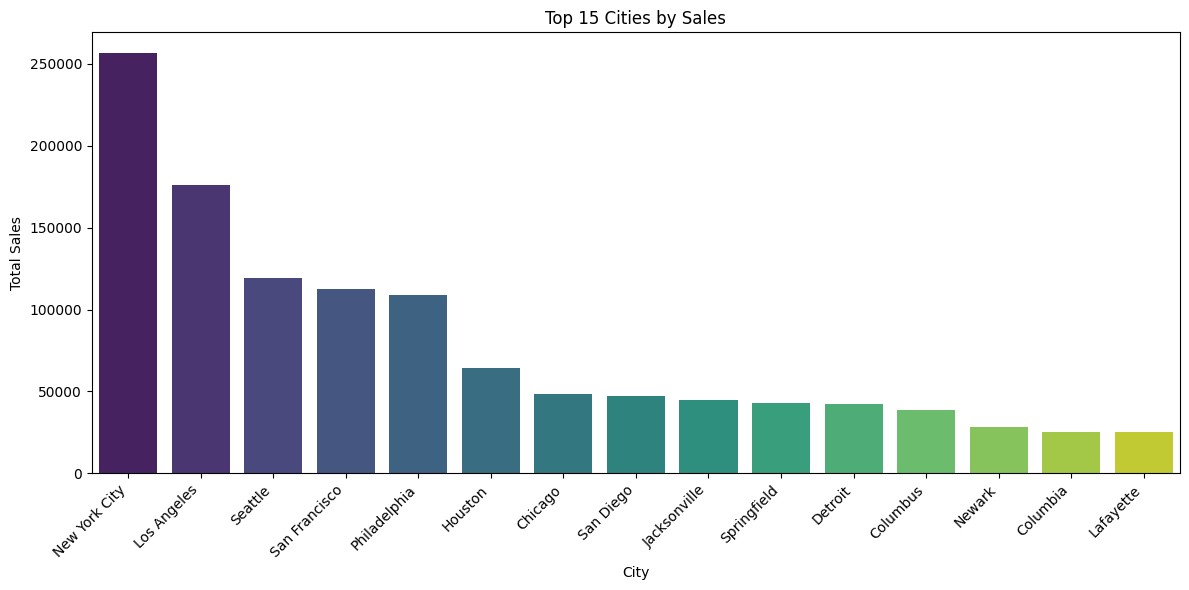

In [6]:
#Plotting Sales by City (Top N cities)
N = 15 # Display top 10 cities
top_cities = city_summary.head(N)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_cities.index, y=top_cities['Sales'], palette='viridis',hue=top_cities.index)
plt.xticks(rotation=45, ha='right')
plt.title(f'Top {N} Cities by Sales')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

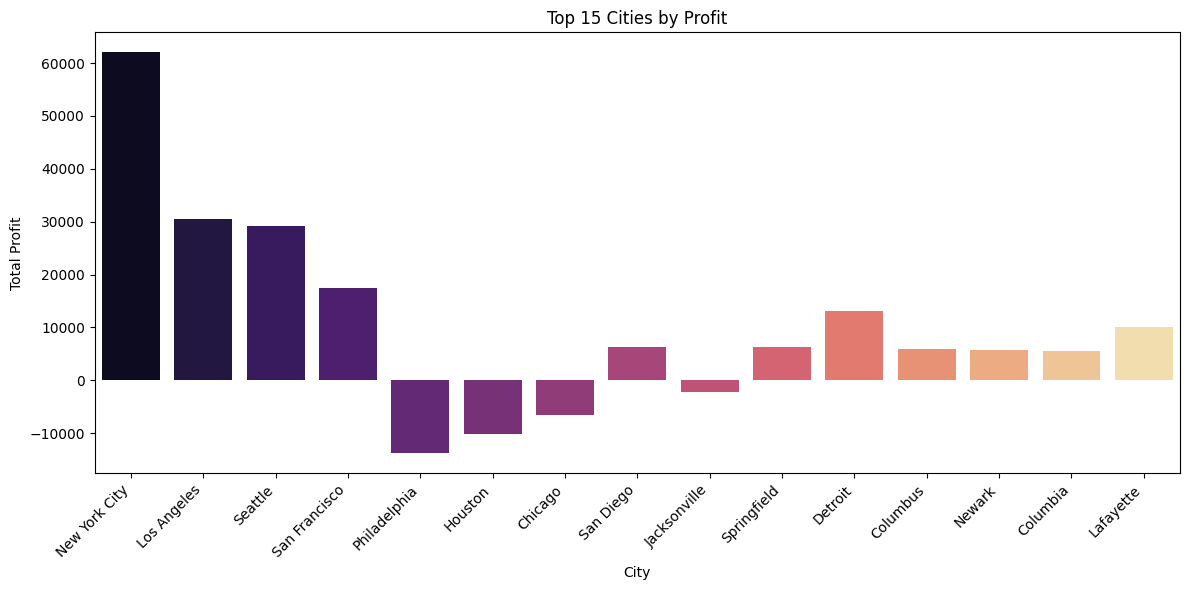

In [7]:
# Plotting Profit by City (Top N cities)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_cities.index, y=top_cities['Profit'], palette='magma',hue=top_cities.index)
plt.xticks(rotation=45, ha='right')
plt.title(f'Top {N} Cities by Profit')
plt.xlabel('City')
plt.ylabel('Total Profit')
plt.tight_layout()
plt.show()


In [8]:
# 2. Sales and Profit by State/Province
state_summary = df.groupby('State/Province').agg({'Sales': 'sum', 'Profit': 'sum'})
state_summary = state_summary.sort_values(by='Sales', ascending=False)
print("\n--- Sales and Profit by State/Province ---")
print(state_summary)


--- Sales and Profit by State/Province ---
                               Sales     Profit
State/Province                                 
California                457,687.63  76,381.39
New York                  310,876.27  74,038.55
Texas                     170,188.05 -25,729.36
Washington                138,641.27  33,402.65
Pennsylvania              116,511.91 -15,559.96
Florida                    89,473.71  -3,399.30
Illinois                   80,166.10 -12,607.89
Ohio                       78,258.14 -16,971.38
Michigan                   76,269.61  24,463.19
Virginia                   70,636.72  18,597.95
North Carolina             55,603.16  -7,490.91
Indiana                    53,555.36  18,382.94
Georgia                    49,095.84  16,250.04
Kentucky                   36,591.75  11,199.70
New Jersey                 35,764.31   9,772.91
Arizona                    35,282.00  -3,427.92
Wisconsin                  32,114.61   8,401.80
Colorado                   32,108.12  -6,527

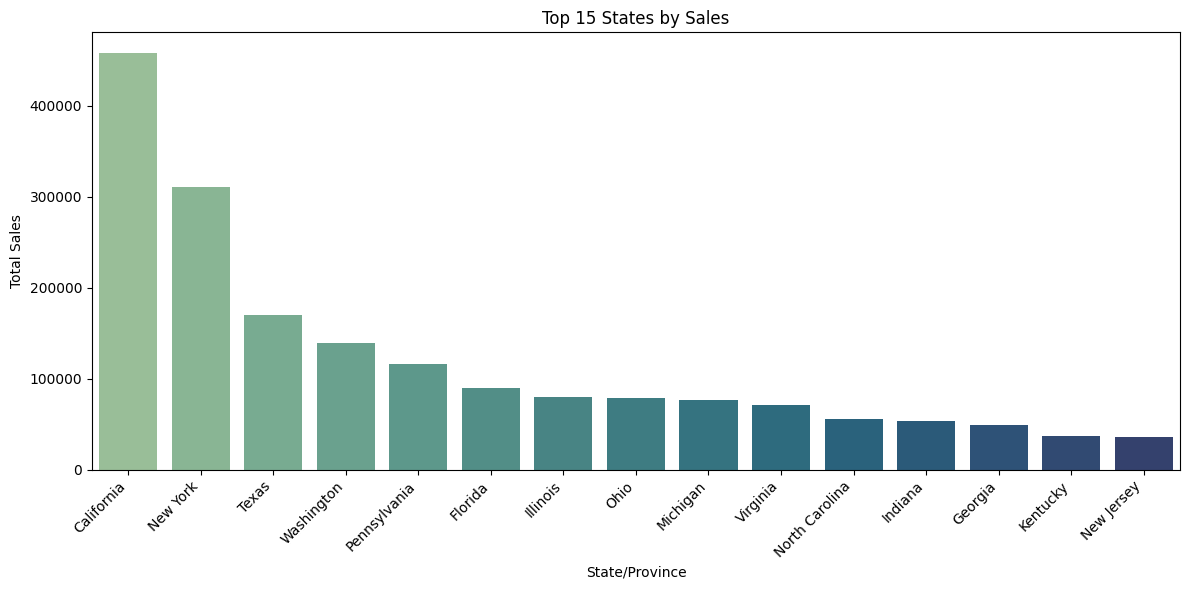

In [9]:
# Plotting Sales by State/Province (Top N states)
top_states = state_summary.head(N) # re-use N value
plt.figure(figsize=(12, 6))
sns.barplot(x=top_states.index, y=top_states['Sales'], palette='crest',hue=top_states.index)
plt.xticks(rotation=45, ha='right')
plt.title(f'Top {N} States by Sales')
plt.xlabel('State/Province')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

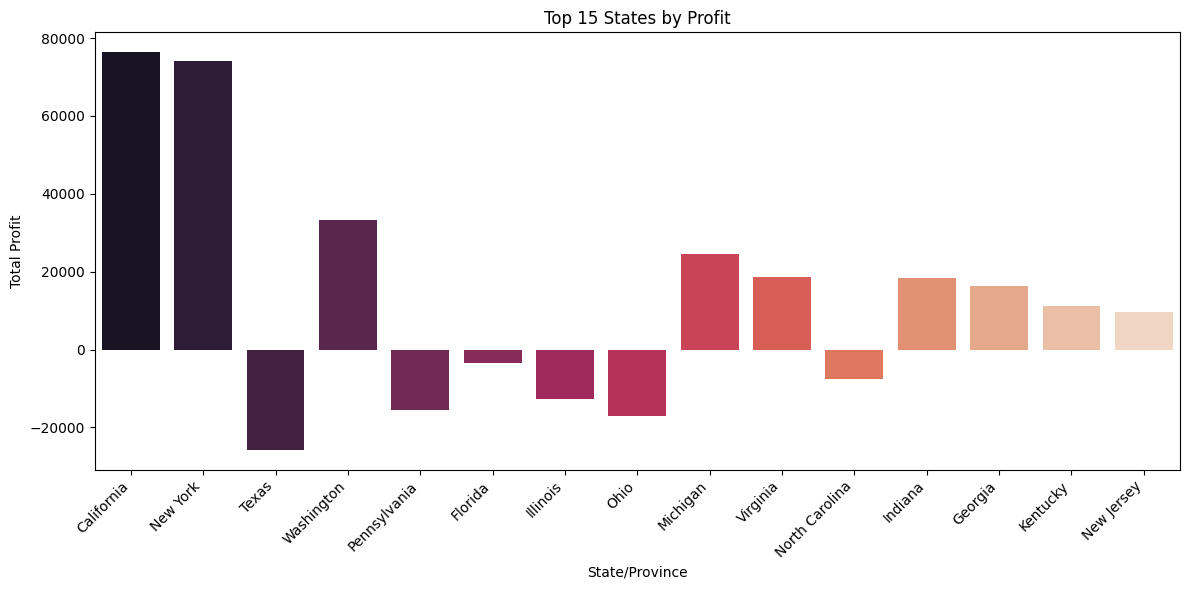

In [10]:
# Plotting Profit by State/Province
plt.figure(figsize=(12, 6))
sns.barplot(x=top_states.index, y=top_states['Profit'], palette='rocket',hue=top_states.index)
plt.xticks(rotation=45, ha='right')
plt.title(f'Top {N} States by Profit')
plt.xlabel('State/Province')
plt.ylabel('Total Profit')
plt.tight_layout()
plt.show()

In [11]:
# 3. City-State Combinations
city_state_summary = df.groupby(['State/Province', 'City']).agg({'Sales': 'sum', 'Profit': 'sum'})
city_state_summary = city_state_summary.sort_values(by=['State/Province', 'Sales'], ascending=[True, False])
print("\n--- Sales and Profit by City/State Combination ---")
print(city_state_summary)


--- Sales and Profit by City/State Combination ---
                             Sales   Profit
State/Province City                        
Alabama        Mobile     5,462.99 2,175.83
               Montgomery 3,722.73   834.66
               Decatur    3,374.82 1,000.09
               Huntsville 2,484.37 1,005.26
               Florence   1,997.35   248.66
...                            ...      ...
Wisconsin      Wausau       317.48    90.43
               West Allis   250.48    28.37
               Sheboygan     79.74    34.34
               Waukesha      54.50    14.17
Wyoming        Cheyenne   1,603.14   100.20

[616 rows x 2 columns]


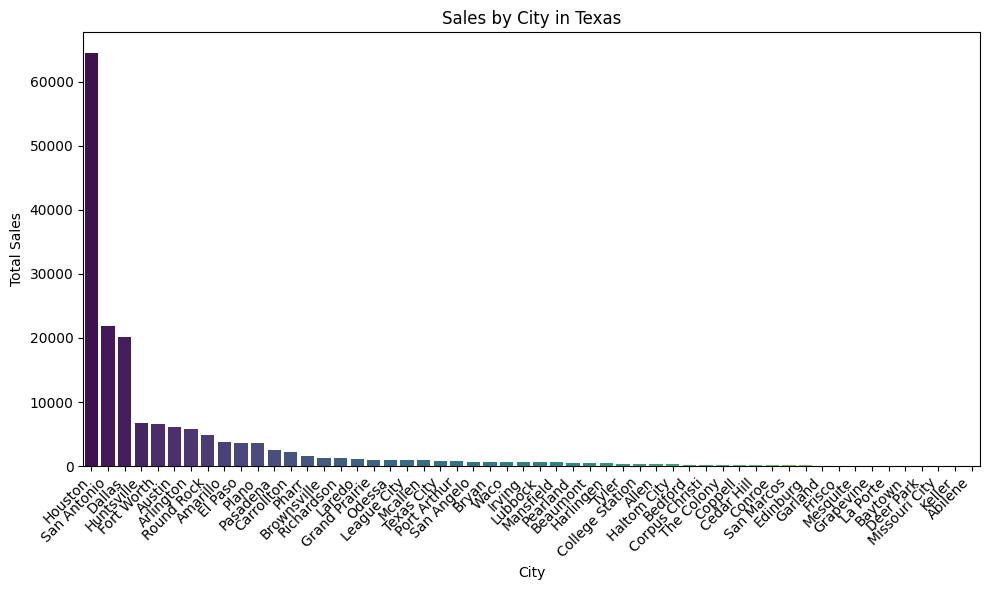

In [12]:
# Plotting (Example:  Sales for each city within a specific State)
selected_state = 'Texas'  # Change this to the state you want to analyze
state_data = city_state_summary.loc[selected_state]
plt.figure(figsize=(10, 6))
sns.barplot(x=state_data.index, y=state_data['Sales'], palette='viridis',hue=state_data.index)
plt.xticks(rotation=45, ha='right')
plt.title(f'Sales by City in {selected_state}')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

In [13]:
# 4.  Profit Margin Analysis by City and State
df['Profit Margin'] = (df['Profit'] / df['Sales']) * 100
city_state_profit_margin = df.groupby(['State/Province', 'City'])['Profit Margin'].mean().sort_values(ascending=False)
print("\n--- Average Profit Margin by City/State Combination ---")
print(city_state_profit_margin)


--- Average Profit Margin by City/State Combination ---
State/Province  City         
Nebraska        Grand Island      50.00
New Jersey      Atlantic City     50.00
South Carolina  Summerville       49.00
New Jersey      New Brunswick     48.50
California      Antioch           48.00
                                  ...  
Texas           Deer Park       -150.00
                Missouri City   -150.00
Illinois        Danville        -160.00
                Romeoville      -165.00
Texas           Abilene         -270.00
Name: Profit Margin, Length: 616, dtype: float64


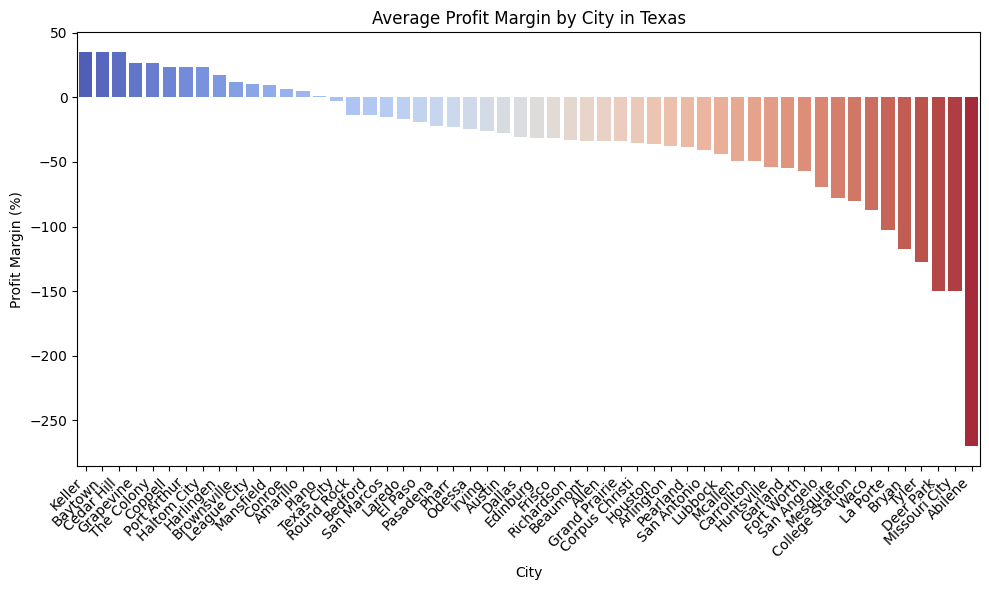

In [14]:
# Plotting (Example: Profit Margin for cities in one state)
state_profit_margin = df[df['State/Province'] == selected_state].groupby('City')['Profit Margin'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=state_profit_margin.index, y=state_profit_margin.values, palette='coolwarm',hue=state_profit_margin.index)
plt.xticks(rotation=45, ha='right')
plt.title(f'Average Profit Margin by City in {selected_state}')
plt.xlabel('City')
plt.ylabel('Profit Margin (%)')
plt.tight_layout()
plt.show()

In [15]:
df.head()

,Ship Mode,Segment,Country/Region,City,State/Province,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Shipping Duration,Profit Margin
0,Standard Class,Consumer,United States,Houston,Texas,Central,Office Supplies,Paper,16.45,2,0.20,5.55,4,33.75
1,Standard Class,Home Office,United States,Naperville,Illinois,Central,Office Supplies,Binders,3.54,2,0.80,-5.49,4,-155.00
2,Standard Class,Home Office,United States,Naperville,Illinois,Central,Office Supplies,Labels,11.78,3,0.20,4.27,4,36.25
3,Standard Class,Home Office,United States,Naperville,Illinois,Central,Office Supplies,Storage,272.74,3,0.20,-64.77,4,-23.75
4,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,East,Office Supplies,Art,19.54,3,0.20,4.88,7,25.00


In [16]:
df = df.drop(['City','State/Province','City','Country/Region','Profit Margin'],axis=1)
df.head()

,Ship Mode,Segment,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Shipping Duration
0,Standard Class,Consumer,Central,Office Supplies,Paper,16.45,2,0.20,5.55,4
1,Standard Class,Home Office,Central,Office Supplies,Binders,3.54,2,0.80,-5.49,4
2,Standard Class,Home Office,Central,Office Supplies,Labels,11.78,3,0.20,4.27,4
3,Standard Class,Home Office,Central,Office Supplies,Storage,272.74,3,0.20,-64.77,4
4,Standard Class,Consumer,East,Office Supplies,Art,19.54,3,0.20,4.88,7


In [17]:
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [18]:
le = LabelEncoder()
df['Category'] = le.fit_transform(df['Category'])
df['Sub-Category'] = le.fit_transform(df['Sub-Category'])
df['Region'] = le.fit_transform(df['Region'])
df['Ship Mode'] = le.fit_transform(df['Ship Mode'])
df['Segment'] = le.fit_transform(df['Segment'])

In [19]:
df.head()

,Ship Mode,Segment,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Shipping Duration
0,3,0,0,1,12,16.45,2,0.20,5.55,4
1,3,2,0,1,3,3.54,2,0.80,-5.49,4
2,3,2,0,1,10,11.78,3,0.20,4.27,4
3,3,2,0,1,14,272.74,3,0.20,-64.77,4
4,3,0,1,1,2,19.54,3,0.20,4.88,7


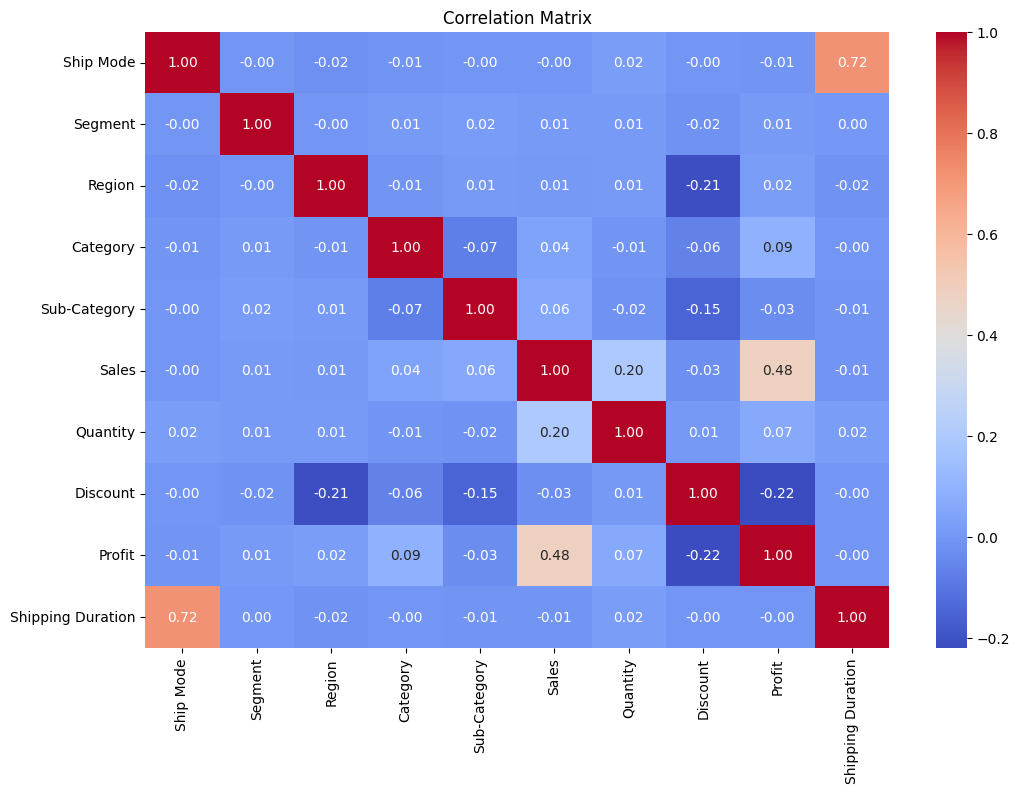

In [20]:
# Correlation Analysis
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [22]:
df = df.drop(['Shipping Duration','Sub-Category','Segment','Region'],axis=1)

In [23]:
# Defining features (X) and target (y)
X = df.drop('Profit', axis=1)
y = df['Profit']

In [24]:
# Split data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
# Model Training
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

LinearRegression()

In [27]:
# Prediction and Evaluation
y_pred_linear = linear_model.predict(X_test_scaled)
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

In [28]:
print("--- Linear Regression ---")
print(f"Mean Squared Error: {mse_linear:.2f}")
print(f"Root Mean Squared Error: {rmse_linear:.2f}")
print(f"Mean Absolute Error: {mae_linear:.2f}")
print(f"R-squared: {r2_linear:.2f}")

--- Linear Regression ---
Mean Squared Error: 53522.75
Root Mean Squared Error: 231.35
Mean Absolute Error: 61.27
R-squared: 0.40


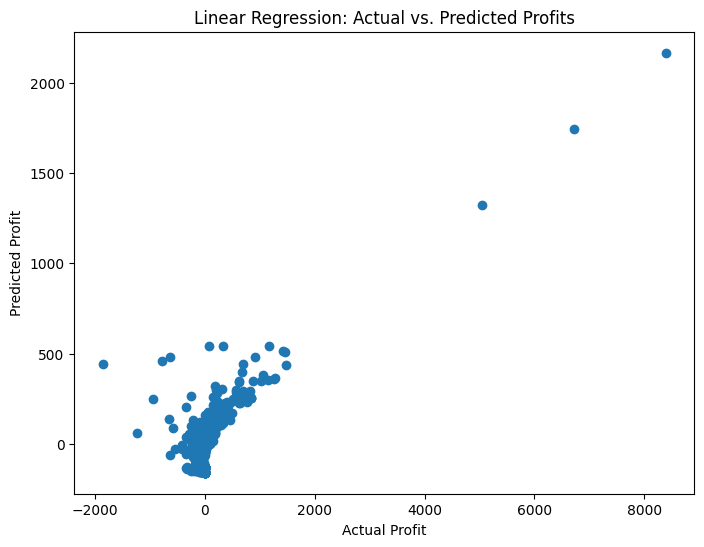

In [48]:
# Scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_linear)
plt.xlabel("Actual Profit")
plt.ylabel("Predicted Profit")
plt.title("Linear Regression: Actual vs. Predicted Profits")
plt.show()

In [30]:
# --- Polynomial Regression ---
# Polynomial Feature Transformation
poly = PolynomialFeatures(degree=2)  # You can try different degrees
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [31]:
# Feature Scaling for Polynomial Features
scaler_poly = StandardScaler()
X_train_poly_scaled = scaler_poly.fit_transform(X_train_poly)
X_test_poly_scaled = scaler_poly.transform(X_test_poly)

In [32]:
# Model Training
poly_model = LinearRegression()
poly_model.fit(X_train_poly_scaled, y_train)

LinearRegression()

In [33]:
# Prediction and Evaluation
y_pred_poly = poly_model.predict(X_test_poly_scaled)
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
mae_poly = mean_absolute_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

In [34]:
print("--- Polynomial Regression ---")
print(f"Mean Squared Error: {mse_poly:.2f}")
print(f"Root Mean Squared Error: {rmse_poly:.2f}")
print(f"Mean Absolute Error: {mae_poly:.2f}")
print(f"R-squared: {r2_poly:.2f}")

--- Polynomial Regression ---
Mean Squared Error: 12153.90
Root Mean Squared Error: 110.24
Mean Absolute Error: 36.35
R-squared: 0.86


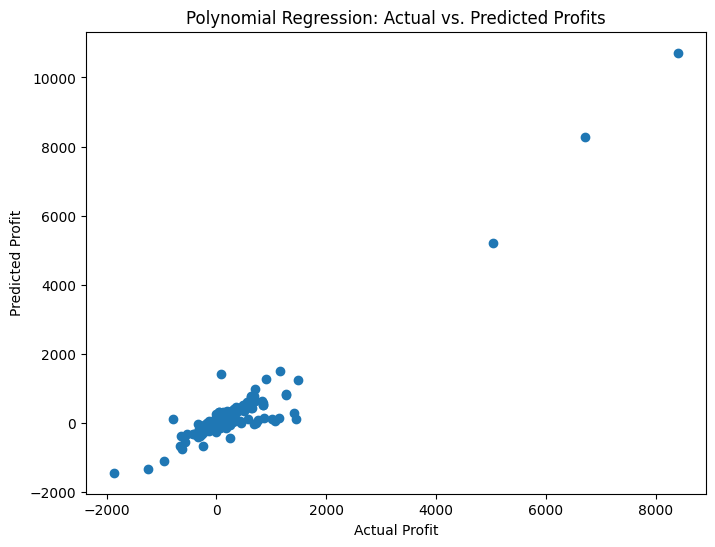

In [49]:
# Scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_poly)
plt.xlabel("Actual Profit")
plt.ylabel("Predicted Profit")
plt.title("Polynomial Regression: Actual vs. Predicted Profits")
plt.show()

In [36]:
# Hyperparameter Tuning using GridSearchCV
elastic_model = ElasticNet()
param_grid = {'alpha': [0.1, 1.0, 10.0],  # Adjust the range as needed
              'l1_ratio': [0.1, 0.5, 0.9]}  # Adjust the range as needed

grid_search = GridSearchCV(elastic_model, param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(X_train_scaled, y_train)


GridSearchCV(cv=3, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1.0, 10.0],
                         'l1_ratio': [0.1, 0.5, 0.9]},
             scoring='neg_mean_squared_error')

In [37]:
# Best Model
best_elastic = grid_search.best_estimator_

In [38]:
# Prediction and Evaluation
y_pred_elastic = best_elastic.predict(X_test_scaled)
mse_elastic = mean_squared_error(y_test, y_pred_elastic)
rmse_elastic = np.sqrt(mse_elastic)
mae_elastic = mean_absolute_error(y_test, y_pred_elastic)
r2_elastic = r2_score(y_test, y_pred_elastic)

In [39]:
print("--- ElasticNet Regression ---")
print("Best Hyperparameters:", grid_search.best_params_)
print(f"Mean Squared Error: {mse_elastic:.2f}")
print(f"Root Mean Squared Error: {rmse_elastic:.2f}")
print(f"Mean Absolute Error: {mae_elastic:.2f}")
print(f"R-squared: {r2_elastic:.2f}")

--- ElasticNet Regression ---
Best Hyperparameters: {'alpha': 1.0, 'l1_ratio': 0.9}
Mean Squared Error: 56206.59
Root Mean Squared Error: 237.08
Mean Absolute Error: 59.38
R-squared: 0.37


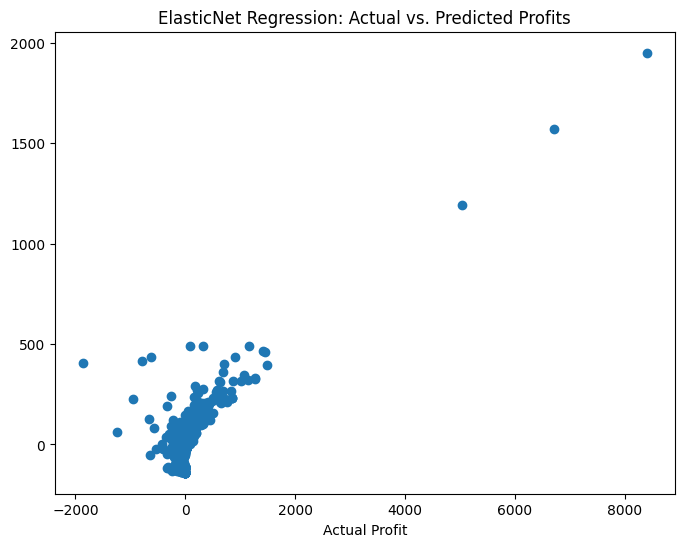

In [50]:
# Scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_elastic)
plt.xlabel("Actual Profit")
plt.title("ElasticNet Regression: Actual vs. Predicted Profits")
plt.show()

In [41]:
# --- Support Vector Regression (SVR) ---
# Hyperparameter Tuning using GridSearchCV
svr_model = SVR()
param_grid_svr = {'kernel': ['linear', 'rbf'],
                  'C': [0.1, 1, 10],
                  'epsilon': [0.01, 0.1, 1]}  # Adjust the range as needed

grid_search_svr = GridSearchCV(svr_model, param_grid_svr, scoring='neg_mean_squared_error', cv=3)
grid_search_svr.fit(X_train_scaled, y_train)


GridSearchCV(cv=3, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10], 'epsilon': [0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf']},
             scoring='neg_mean_squared_error')

In [42]:
# Best Model
best_svr = grid_search_svr.best_estimator_

# Prediction and Evaluation
y_pred_svr = best_svr.predict(X_test_scaled)
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)


In [43]:
print("--- Support Vector Regression (SVR) ---")
print("Best Hyperparameters:", grid_search_svr.best_params_)
print(f"Mean Squared Error: {mse_svr:.2f}")
print(f"Root Mean Squared Error: {rmse_svr:.2f}")
print(f"Mean Absolute Error: {mae_svr:.2f}")
print(f"R-squared: {r2_svr:.2f}")


--- Support Vector Regression (SVR) ---
Best Hyperparameters: {'C': 10, 'epsilon': 1, 'kernel': 'rbf'}
Mean Squared Error: 81377.33
Root Mean Squared Error: 285.27
Mean Absolute Error: 42.57
R-squared: 0.09


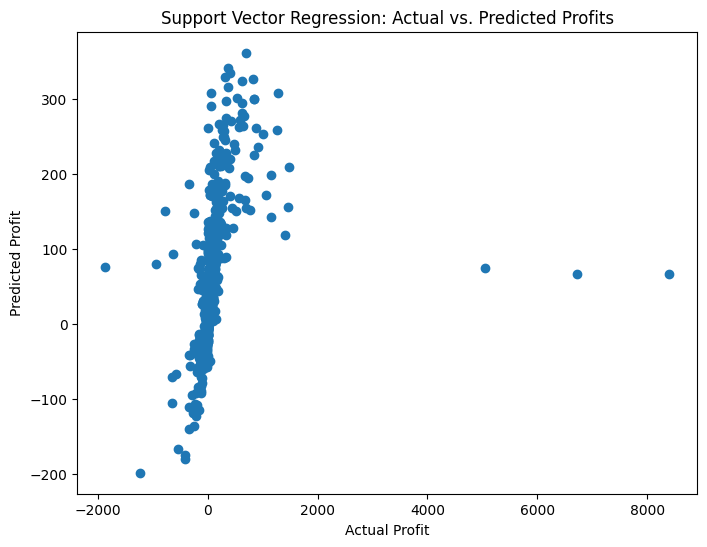

In [51]:
# Scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_svr)
plt.xlabel("Actual Profit")
plt.ylabel("Predicted Profit")
plt.title("Support Vector Regression: Actual vs. Predicted Profits")
plt.show()

In [45]:
from sklearn.ensemble import RandomForestRegressor
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 5, 10, 20],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]       # Method of selecting samples for training each tree
}

# Create a RandomForestRegressor object
rf_model = RandomForestRegressor(random_state=42) # Setting random_state for reproducibility

# Create a GridSearchCV object
grid_search = GridSearchCV(rf_model, param_grid, scoring='neg_mean_squared_error', cv=3, verbose=1, n_jobs=-1) #n_jobs=-1 uses all available cores

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_scaled, y_train)


Fitting 3 folds for each of 216 candidates, totalling 648 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error', verbose=1)

In [46]:
print("Best parameters found:")
print(grid_search.best_params_)

# Get the best estimator (the best model)
best_rf = grid_search.best_estimator_

# Make predictions on the test set
y_pred_rf = best_rf.predict(X_test_scaled)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("--- RandomForestRegressor Results ---")
print(f"Mean Squared Error: {mse_rf:.2f}")
print(f"Root Mean Squared Error: {rmse_rf:.2f}")
print(f"Mean Absolute Error: {mae_rf:.2f}")
print(f"R-squared: {r2_rf:.2f}")

Best parameters found:
{'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
--- RandomForestRegressor Results ---
Mean Squared Error: 23665.25
Root Mean Squared Error: 153.84
Mean Absolute Error: 27.11
R-squared: 0.74


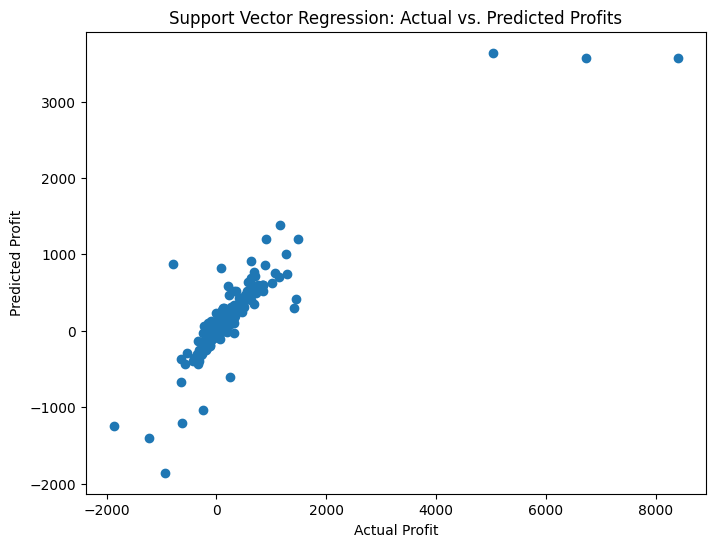

In [52]:
# Scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf)
plt.xlabel("Actual Profit")
plt.ylabel("Predicted Profit")
plt.title("Support Vector Regression: Actual vs. Predicted Profits")
plt.show()